# CS2006 Python Practical 2

# 0. Import the Required Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import json

In [5]:
import networkx as nx

In [6]:
from wordcloud import WordCloud as wc

In [7]:
from collections import Counter

In [8]:
df=pd.read_csv("CometLanding.csv")

### Check the Initial Length of the CSV File

In [9]:
len(df)

77319

### Check the Data Type of Each Column

In [10]:
df.dtypes

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                     object
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
status_url                    object
entities_str                  object
dtype: object

## 1. Refine the Dataset

### 1) Check Data File for Duplicated Tweets and Remove Duplicates

In [11]:
df.drop_duplicates(['id_str'], inplace = True)

In [12]:
len(df)

77268

### 2) Remove Text That is Null

In [13]:
df = df[df['text'].notnull()]

In [14]:
len(df)

77267

## 2. Perform the Descriptive Analysis of the Dataset

### 1.1) Calculate the Total Number of Tweets

In [15]:
numTweets = len(df[(df['in_reply_to_user_id_str'].notnull() == False) #Filters out replies
                   & (df['text'].str.startswith('RT', na=False) == False)]) #Filters out retweets

In [16]:
print("Total number of tweets (excluding replies and retweets): " 
      + str(numTweets)) #Filters out retweets

Total number of tweets (excluding replies and retweets): 15582


### 1.2) Calculate the Total Number of Retweets

In [17]:
dfRT = df[df.text.str.startswith('RT', na=False)]

In [18]:
numRT = len(dfRT)

In [19]:
print("Total number of retweets: " + str(numRT))

Total number of retweets: 59998


### 1.3) Calculate the Total Number of Replies

In [20]:
dfReplies = df[df['in_reply_to_user_id_str'].notnull()]

In [21]:
numReplies = len(dfReplies)

In [22]:
print("Number of replies: " + str(numReplies))

Number of replies: 1723


### 2) Calculate the Total Number of Different Users Tweeting in this DataSet

In [23]:
numUsers = len(df['from_user'].unique())

In [24]:
print("The number of users: " + str(numUsers))

The number of users: 50195


### 3.1) Calculate the Average Number of Tweets by a User

In [25]:
print("Average number of tweets: ", str(numTweets / numUsers))


Average number of tweets:  0.31042932563004283


### 3.2) Calculate the Average Number of Retweets by a User

In [26]:
print("Average number of retweets: ", str(numRT / numUsers))

Average number of retweets:  1.195298336487698


### 3.3) Calculate the Average Number of Replies Sent by a User

In [27]:
print("Average number of replies: ", str(numReplies / numUsers))

Average number of replies:  0.03432612810040841


### 4) Identify the Most Popular Hashtags

In [28]:
hashtags_list = df.text.str.findall(r'#.*?(?=\s|$)') #Gets all text starting with a hash #https://stackoverflow.com/questions/45874879/extract-hashtags-from-columns-of-a-pandas-dataframe
hashtags = hashtags_list.tolist() #Converts data to list format
hashtags = [item for sublist in hashtags for item in sublist] #Flattens list of lists to list. # https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
count = Counter(hashtags) #Gets the counts for each hashtag
count.most_common() #Gets the list in order of most popular
for hashtag in count.most_common(): #Prints hashtags
    print(hashtag[0], hashtag[1])

#CometLanding 53441
#cometlanding 10486
#67P 5872
#Rosetta 4978
#Philae 2613
#CometLanding: 1745
#Cometlanding 1004
#CometLanding. 981
#WishKoSaPasko 970
#HappyBirthdaySandaraPark 965
#67P/CG 701
#esa 676
#rosetta 675
#SEP 623
#philae 588
#PoseToiPhilae 535
#Comâ€¦ 514
#CometLanding, 462
#space 443
#comâ€¦ 422
#cometlanding, 413
#CometLâ€¦ 408
#67P. 406
#rosettamission 404
#ESA 396
#comet 346
#CometLanâ€¦ 342
#cometlanding. 323
#cometlaâ€¦ 323
#CometLanding! 257
#Philae2014 254
#Câ€¦ 251
#â€¦ 239
#ISS 231
#COMETLANDING 230
#AOS 223
#RejectedMuppets 218
#HomeToMama 206
#Cometâ€¦ 205
#67P, 194
#CometLanding? 190
#CometLandingâ€ 190
#Comeâ€¦ 189
#science 182
#CometLanding" 153
#BreakTheInternet 147
#DoctorWho 146
#TimoGH15 146
#xkcd 145
#câ€¦ 143
#Rosetta's 142
#Rosetta, 142
#GUERRIERO 142
#spaceveg 138
#Agilkia 133
#CometLaâ€¦ 131
#67P! 127
#67P: 124
#autoinculpacions9N 120
#CometWatch 119
#trndnl 118
#cometlanding! 113
#CometLandiâ€¦ 109
#CometLandâ€¦ 109
#cometlanding: 108
#ESA_Rosett

#Muvhango 2
#eusouobservador 2
#MisiÃ³nRosetta, 2
#TowieFinale 2
#HotSpices 2
#Ecopop 2
#Design 2
#Armegeddon 2
#cbcto: 2
#GTA 2
#Darmstadt. 2
#MexicoVsHolanda 2
#RosettaMission: 2
#maxfotball 2
#phraseis_pou_tromazoun 2
#Oranje 2
#FB 2
#ApolloXI 2
#moon! 2
#shirtstorm! 2
#IDontAlwaysRideCometsButWhenIDo 2
#futureisnow 2
#TMLtalk 2
#quirÃ³fano 2
#traumatologÃ­a 2
#Wheredeyatdoe 2
#EliteDangerouâ€¦ 2
#mindblown 2
#universe 2
#67P'nin 2
#MH370 2
#scritturebrevi 2
#CometLanding!): 2
#hoax 2
#JenniferAniston 2
#HorribleBosses2 2
#Ukrainian 2
#CometLanding.... 2
#CFAXTalk 2
#Comet67PChuryumovGerasimenko 2
#CyberMonday 2
#Scifi 2
#MuchCloserToHome 2
#317millionmiles 2
#gamedâ€¦ 2
#Interstellar! 2
#FTW 2
#AWOLNATION 2
#67P!" 2
#BuenFinBestBuy 2
#Solo99 2
#ego 2
#Anonymity? 2
#Mentaphone 2
#tousensemble 2
#starbucks 2
#Destiny 2
#science! 2
#BanRussiaFromUNSC 2
#Cometlanding: 2
#NotScienceFiction 2
#STEM+ 2
#TweetsFromSunday 2
#ROSETTAÂ 2
#2014 2
#infographic 2
#recomiendaunLIBRO 2
#StanislawL

#LincolnMKC... 1
#easyAs 1
#spaceboy 1
#WomenInSTEM 1
#WhoKnew 1
#Cybeâ€¦ 1
#159worldareasand1comet 1
#nazarene 1
#booklanding 1
#librarylife 1
#teamfollowback 1
#MissionStatement 1
#WeAreEffed 1
#Regginator 1
#ECOPOP 1
#Glan 1
#TrafficWarden 1
#NoParking 1
#BelgiumvsIceland 1
#Newsnight 1
#iTunes 1
#Ð¤Ð¾Ñ‚Ð¾ 1
#ifuckinglovescience 1
#WhereDoBrokenHeartsGo 1
#Zlatan 1
#directioner 1
#DirectionersAllOverTheWorld 1
#asyoudo 1
#xmed 1
#stuckit!!! 1
#Wellalmost; 1
#codeofpoints 1
#FIG!!! 1
#photography 1
#harpoonproblems 1
#Philea2014 1
#SocialListening 1
#TheApprentâ€¦ 1
#loudandproud 1
#bwstoa 1
#bwisâ€¦ 1
#cometlandingÂ 1
#brilliant 1
#vision 1
#motivation 1
#OprahsFavoriteThings2014 1
#quote 1
#Yogeshwar 1
#SweetNovember 1
#trendy 1
#confusing 1
#TrendingIndia 1
#LoveSteel 1
#PlanB 1
#LevyOut 1
#THFC 1
#thumbsup 1
#Tatoos 1
#NASA,now 1
#Chelmsford 1
#GoogleDoodle! 1
#WaifuWednesday 1
#Teamwork 1
#WTC1 1
#CometLandingã€ã‚’è¦‹ã¾ã›ã‚“ã‹ 1
#SillyScientists 1
#BreakTheInterneâ€¦ 1
#UCL 

#AndreaAccomazzo 1
#success 1
#ScientistsClapping 1
#welcometothefuture 1
#SpaceJam! 1
#panic 1
#$#@ 1
#MyAmbition 1
#shivers. 1
#Cienciaenmovimiento 1
#mazin 1
#FuckYouInternets 1
#nÃ¶rtti 1
#realmenhug 1
#ArmageddonwasnotasgoodasDeepImpact 1
#BlitzenLanding? 1
#Landed 1
#cometlanding". 1
#ESARosetta 1
#stoned 1
#ÃšLTIMOMINUTO: 1
#Granada 1
#Starbucks 1
#mindblowing 1
#scientists 1
#helluvalife 1
#Clangers! 1
#yayscience 1
#ILoveFreakinScience! 1
#scienâ€¦ 1
#Humanity 1
#/Rosetta 1
#CometLandingâ€bravo!! 1
#onuchapel 1
#letsprobe 1
#cometizar 1
#WeHaveLanded 1
#engineerhugs 1
#sciencebitch 1
#Hot 1
#hyperventilating 1
#Hahohe 1
#Oops 1
#breaking 1
#OrlÃ©ans 1
#NLP 1
#FenerbahÃ§eDeyince 1
#InsurgentTeaser 1
#Hardcopy 1
#ijustneedspace 1
#67PCG, 1
#NetNeutrality 1
#esa: 1
#selfi 1
#Enhorabuena 1
#nerding 1
#HYPED 1
#Darâ€¦ 1
#YEEEEEEEHAAAAAAAAAA 1
#naftemporiki 1
#CometLanding.) 1
#CL 1
#vsconnect? 1
#PoseToiPhilaâ€¦ 1
#Philaedirect 1
#europe 1
#Dream 1
#Partner 1
#changetheworld 1
#Ca

#teameurope 1
#Nabilla 1
#CometLanding.. 1
#cologne 1
#APEC 1
#G20. 1
#amomentinhistory 1
#xkcd'sâ€œLiveâ€ 1
#someonestillcareaboutscience 1
#CosmicCareers 1
#Events, 1
#pypchat 1
#wurstisthebest 1
#comtron 1
#komet 1
#Gabbarism 1
#fingerscrossedforphilae 1
#italy 1
#FingersCrâ€¦ 1
#conspiracy 1
#loons 1
#AsYouDo 1
#Heilbronn 1
#zombie 1
#NaNoWriMo 1
#NASAneedsIdeasFromHollywood 1
#frenabilla 1
#Luna 1
#Marte 1
#Indostar-2 1
#Churi, 1
#startup 1
#12N 1
#Miranda 1
#lokaljournalismus 1
#JokeHijack 1
#nasa#TinaHelmeAuthor 1
#gtlds 1
#domaining 1
#RendezvouzWithAComet 1
#Acometissage 1
#Japanseries 1
#myassignmenthelp 1
#italia 1
#ASI 1
#astronomâ€¦ 1
#NeverStopExploring 1
#HistoryInThâ€¦ 1
#FreisingSuperbubbles 1
#labnews 1
#amcreâ€¦ 1
#Earth!!! 1
#FeatherWeight 1
#ZombieApocalypse? 1
#Darmstadt, 1
#aovivo 1
#astronomia 1
#petrole 1
#offshore 1
#GamersAgainstGamerGate 1
#breakaleg 1
#allthebest 1
#ifonly 1
#WEIHNACHTSLOTTERIE 1
#LoteriaNavidad 1
#weihnachten 1
#ZwartePiet. 1
#TopicsZA 1


## 3. Build plots/visualisations

### 3.1) The structure of the dataset

In [29]:
structure_names = ["Tweets", "Retweets", "Replies"]

In [30]:
structure_data = [numTweets, numRT, numReplies]

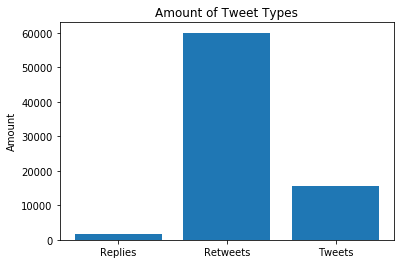

In [31]:
plt.bar(structure_names, structure_data, align="center")
plt.ylabel('Amount')
plt.title('Amount of Tweet Types')
plt.show()

### 3.2) The timeline of the tweets activity

In [32]:
df.time = [str(x) for x in df["time"]]
df.time = [x.split(" ")[0] for x in df["time"]]
df.time = pd.to_datetime(df.time, dayfirst=True)

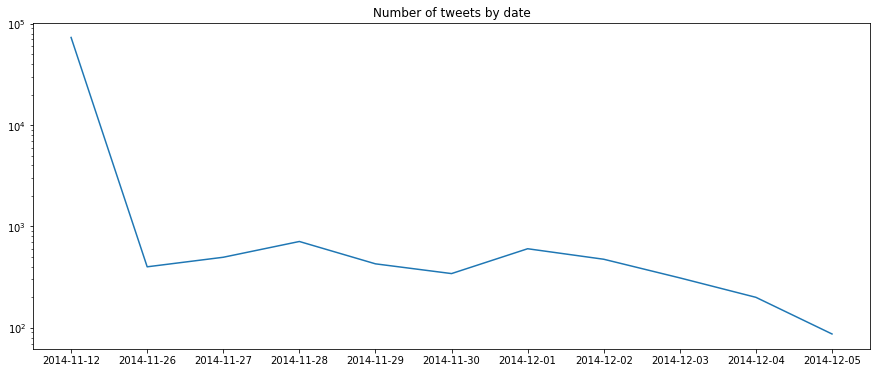

In [33]:
plt.rcParams["figure.figsize"] = [15, 6]
#values = df["time"].value_counts()
#values.index = pd.to_datetime(values.index)
#values = values.sort_index()
values = pd.DataFrame(df["time"].value_counts().reset_index())
values.columns = ["date", "amount"]
values = values.sort_values(by="date")
plt.plot([str(x).split(" ")[0] for x in values.date], values.amount)
plt.yscale("log")
plt.title("Number of tweets by date")

#for i in values:
    #plt.annotate(values.amount[i], (values.date[i], values.amount[i])
    
plt.show()

### 3.3) Word cloud for hashtags

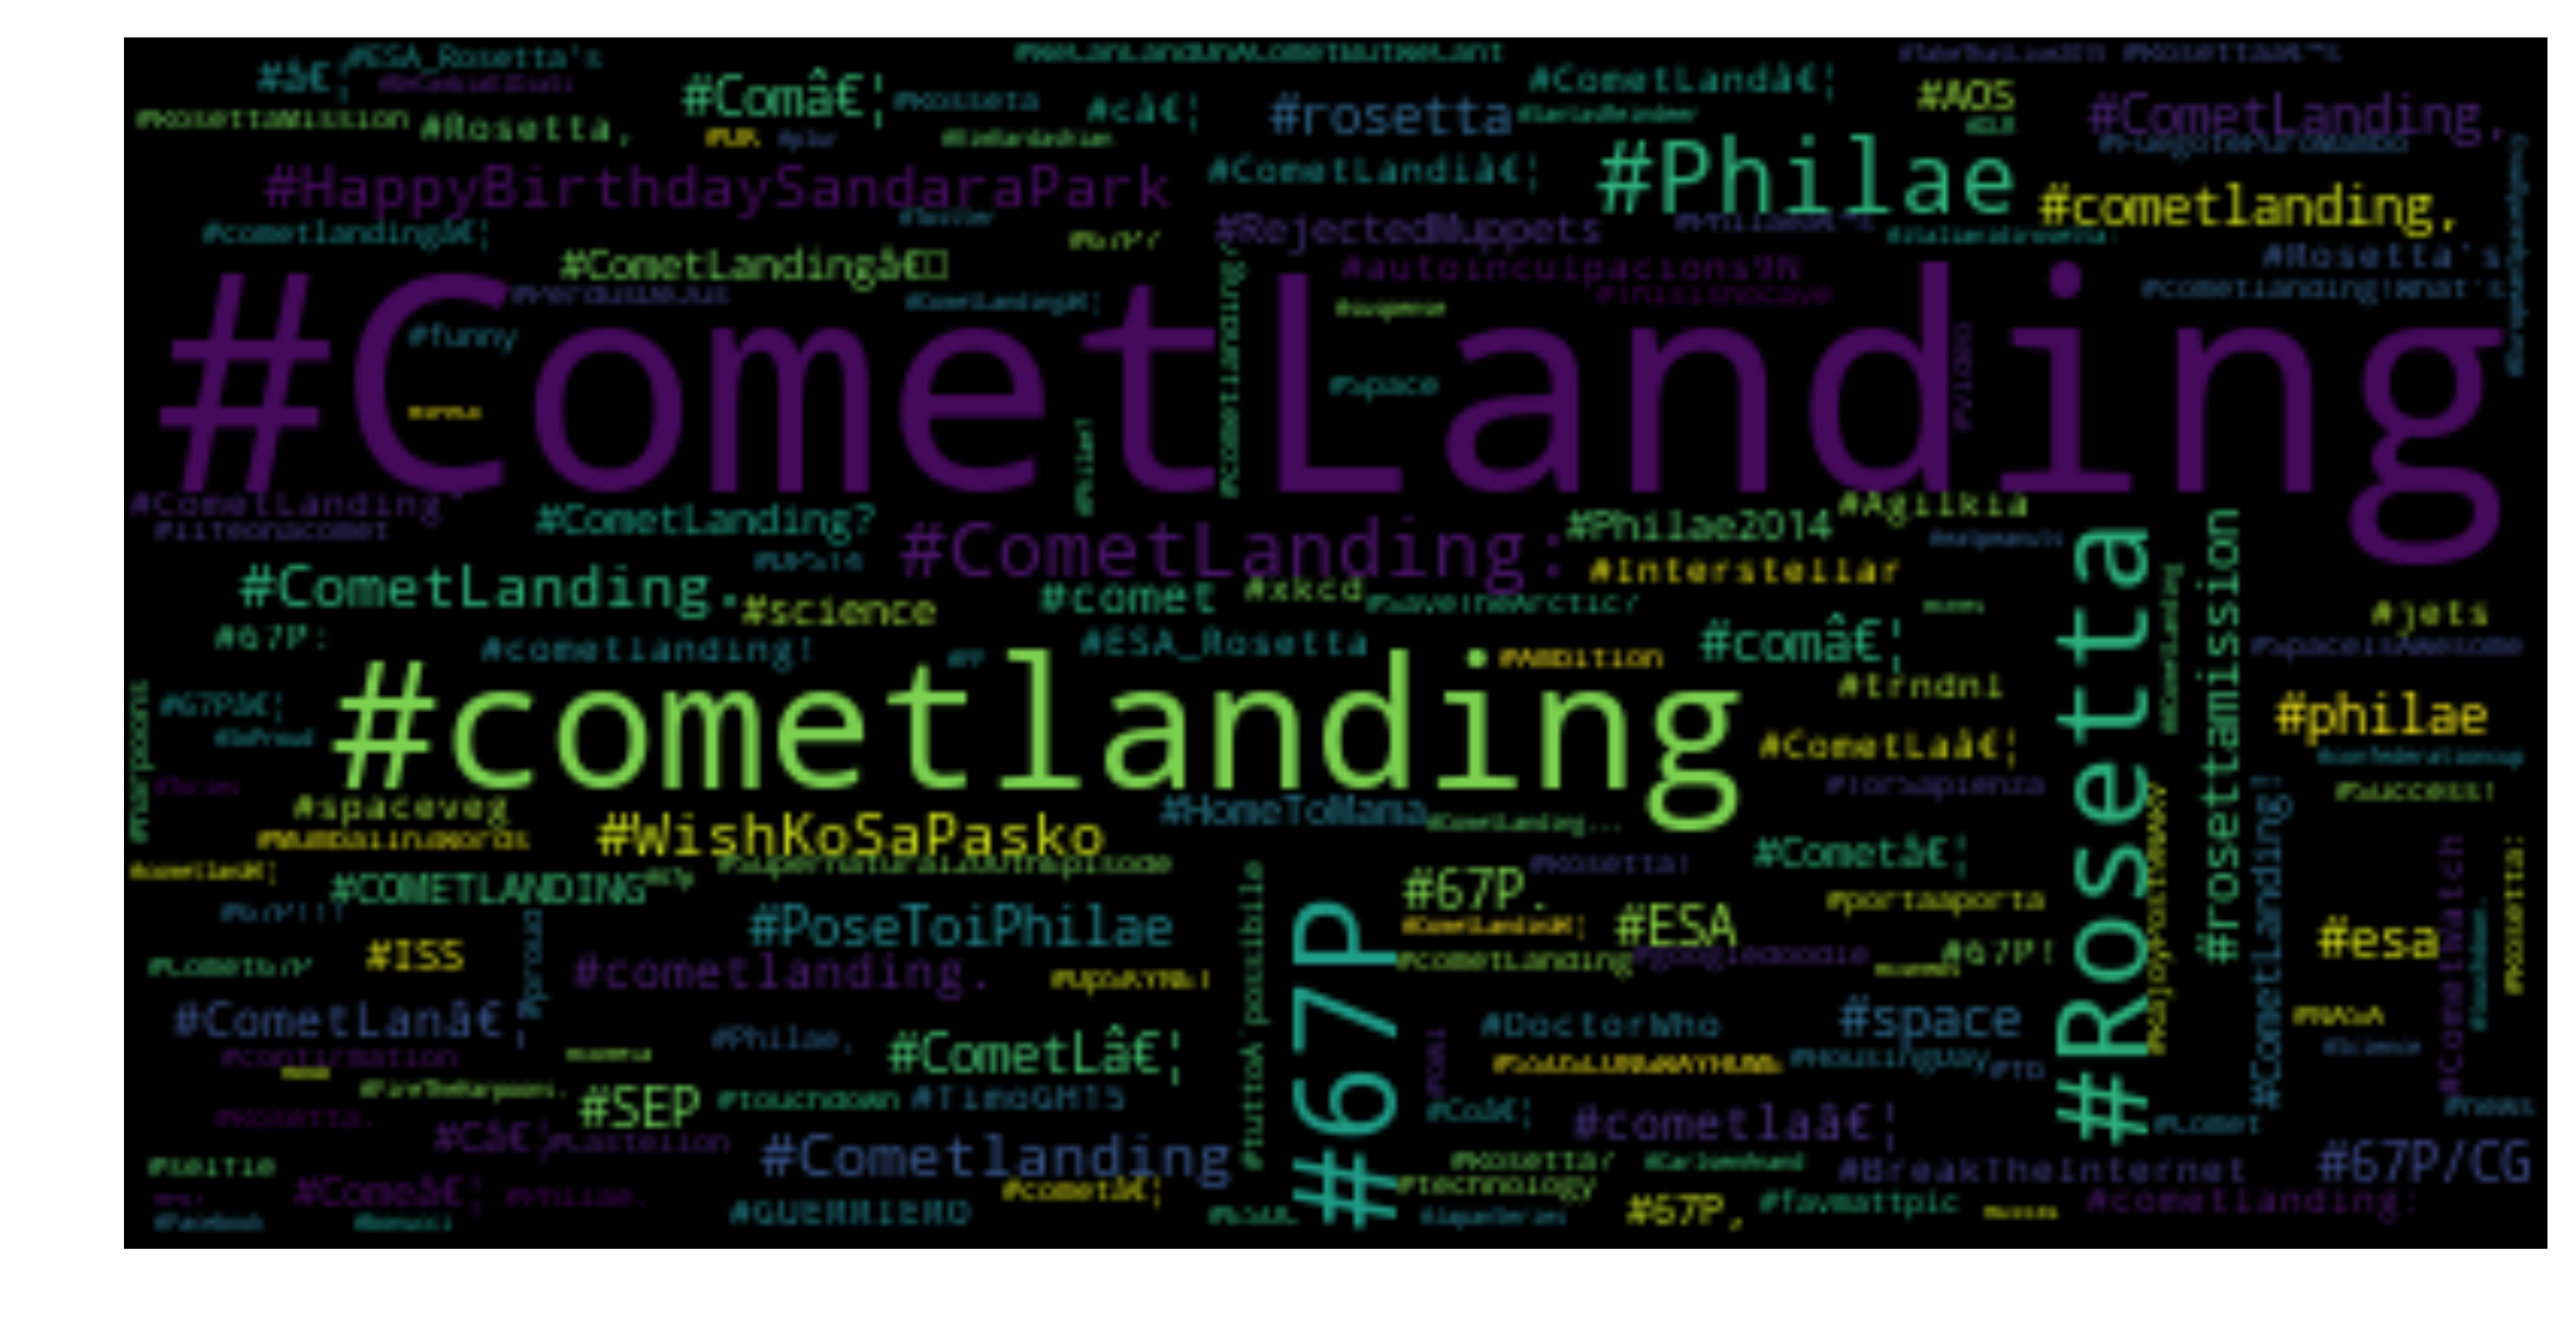

In [34]:
hashtagDictionary = dict(count)

wordcloud = wc(max_font_size=80).generate_from_frequencies(hashtagDictionary)
plt.figure(dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Extensions

## Easy 1 - Analyse applications used to send tweets

In [196]:
app_list = df.source.str.findall(r'<a[^>]*>(.*)</a>') #https://stackoverflow.com/questions/36336228/python-regex-extract-text-within-html-tags
app_list = app_list.tolist()
i = 0
for item in app_list:
    if isinstance(item, list):
        app_list[i] = item[0]
    i+=1
apps = pd.Series(app_list).value_counts().reset_index()
print("Total number of unique applications: " + str(len(apps)))
print("10 most popular applications, number 5 will SHOCK you!")
apps.columns = ["Applications", "Number"]
for i in range(1, 10):
    print(str(i) + ". " + apps["Applications"][i] + " - " + str(apps["Number"][i]))

Total number of unique applications: 482
10 most popular applications, number 5 will SHOCK you!
1. Twitter for iPhone - 13743
2. Twitter for Android - 12770
3. TweetDeck - 4075
4. Twitter for iPad - 3282
5. dlvr.it - 1671
6. Twitter for Websites - 1462
7. Tweetbot for iÎŸS - 1055
8. Twitter for Windows Phone - 932
9. Tweet Old Post - 925


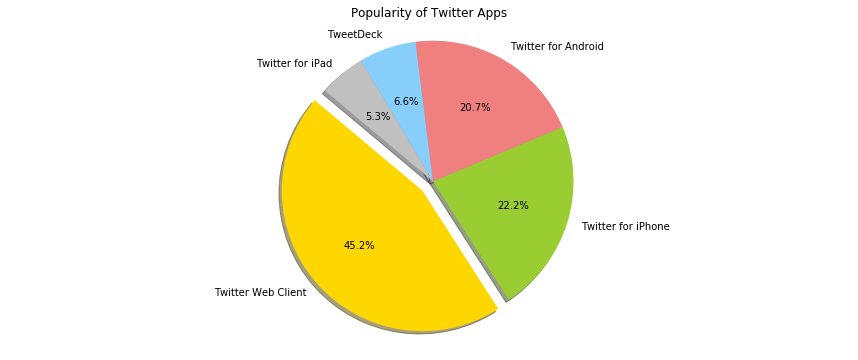

In [197]:
popular_apps = apps.iloc[0:5] #Get 5 most popular
popular_apps.columns = ["Applications", "Number"]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'silver']
explode = (0.1, 0, 0, 0, 0) 
 
plt.pie(popular_apps["Number"], explode=explode, labels=popular_apps["Applications"], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Popularity of Twitter Apps")
plt.show()

## Easy 2 - More descriptive analysis

### Average time each user was retweeted and replied

In [191]:
cd = df[["text", "from_user"]]
pd.options.mode.chained_assignment = None
cd.drop_duplicates(["text"], inplace = True) #Duplicate tweets don't count
cd.drop_duplicates(["from_user"], inplace = True) #Count the number of users
cd = cd["text"][np.logical_not (cd["text"].str.startswith('RT', na=False))] #Don't count retweets of retweets, since it should be attributed to the original user
num_unique_users = len(cd);
print("Number of users who made a unique tweet:", str(num_unique_users))

Number of users who made a unique tweet: 11603


In [192]:
numRTPerUser = numRT / num_unique_users
print("Avg. number of times each user was retweeted:", str(numRTPerUser))

Avg. number of times each user was retweeted: 5.170904076531931


In [193]:
numUserReplies = len(df[df['in_reply_to_user_id_str'].notnull()])
print("Number of times a user was replied: ", numUserReplies)

Number of times a user was replied:  1723


In [194]:
numRepliesPerUser = numUserReplies / numUsers
print("Avg. number of times each user was replied:", str(numRepliesPerUser))

Avg. number of times each user was replied: 0.03432612810040841


### Popular hours

Most popular hours to tweet:


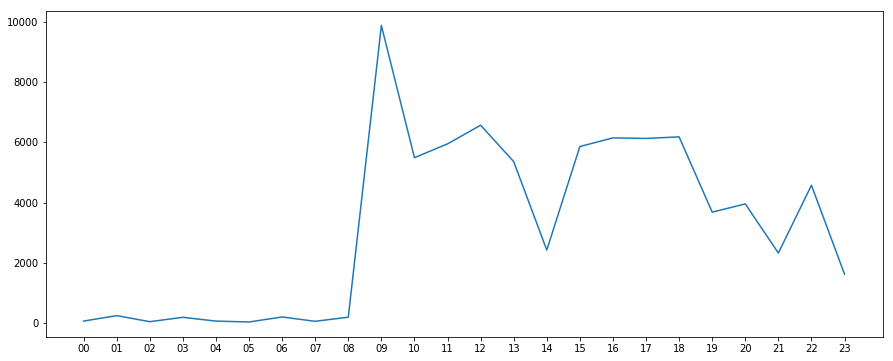

In [198]:
df["hour_time"] = [str(x) for x in df["time"]]
df["hour_time"] = [x.split(" ")[1].split(":")[0] for x in df["time"]]
df["hour_time"] = pd.Series(item for item in df["hour_time"])

a = Counter(df["hour_time"])
hours = [keys for keys in a]
values = [a[str(hour)] for hour in hours]
pt = {"hours":hours, "values":values}
pt = pd.DataFrame(pt)
pt = pt.sort_values(by="hours")
pt = pt.iloc[0:24]

print("Most popular hours to tweet:")
plt.plot(pt["hours"], pt["values"])
plt.show()

## Medium to Hard - Using networkx library to visualise the data

### 1) Analysis of User Connections through Replies

In [37]:
initGraph = nx.Graph() # generate the initial graph instance

# Add all replies as edges and users as nodes
for index, tweet in dfReplies.iterrows():
    initGraph.add_node(tweet['from_user'])
    initGraph.add_edge(tweet['from_user'], tweet['in_reply_to_screen_name'])

In [38]:
searchDepth = 3 # set the default depth of the search as 3

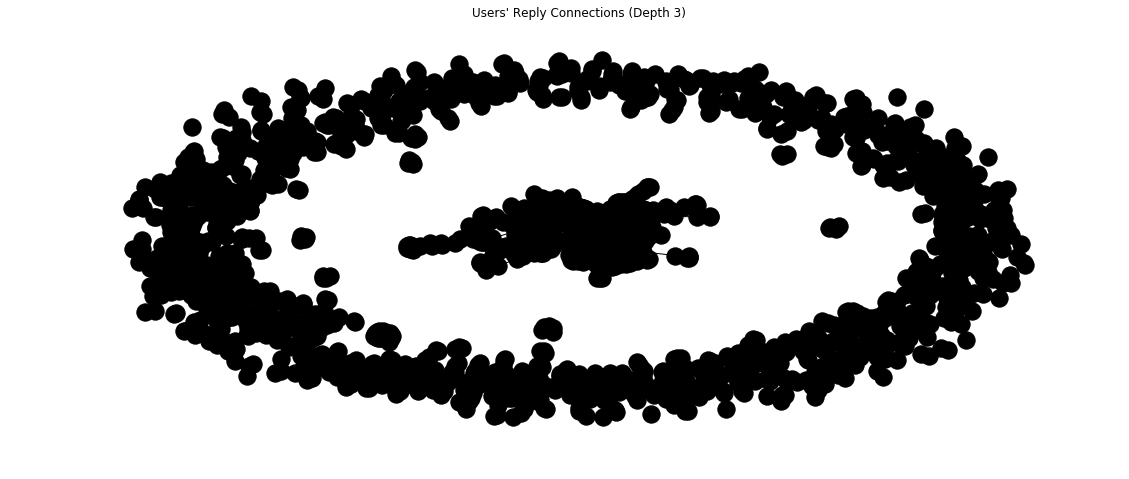

In [39]:
# Draw Graph
pos = nx.spring_layout(initGraph)
nx.draw(initGraph, pos, node_color='k')
plt.title("Users' Reply Connections (Depth " + str(searchDepth) + ")")
plt.rcParams['figure.figsize'] = [30, 2] # set the default size of the output figure by using the variable called rcParams.
plt.show()

### 2) Analysis of User Connections through Mentions

In [40]:
# Build the Relationship graph
mentionGraph = nx.Graph()
searchDepth = 1

### 3) Analysis of User Connections through Retweets

In [41]:
retweetGraph = nx.Graph()
searchDepth = 2

In [42]:
# Add all replies as edges and users as nodes
for index, tweet in dfRT.iterrows():
    retweetGraph.add_node(tweet['from_user'])
    textRT = tweet['text']
    textRT = textRT.split(" ")[1].replace(":", "").replace("@","")
    retweetGraph.add_edge(tweet['from_user'], textRT)

In [ ]:
# Draw Graph
pos = nx.spring_layout(retweetGraph)
nx.draw(retweetGraph, pos, node_color='b')
plt.title("User Reply Connections (Depth " + str(searchDepth) + ")")
plt.rcParams['figure.figsize'] = [105, 15]
plt.show()